In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# read by default 1st sheet of an excel file
df = pd.read_excel('1 - Project Data.xlsx')

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [74]:
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [19]:
df.duplicated().sum()

0

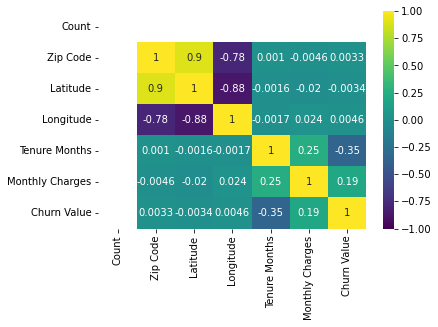

In [18]:
sns.heatmap(df.corr(),
           vmin = -1,
           vmax = 1,
           annot = True,
           cmap = 'viridis')
plt.show()

In [20]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


<Figure size 576x288 with 0 Axes>

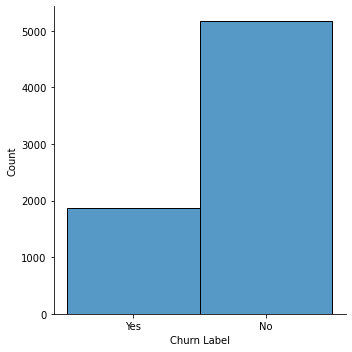

In [58]:
plt.figure(figsize=(8, 4))
sns.displot(data=df, 
             x='Churn Label')
plt.title('')
plt.show()

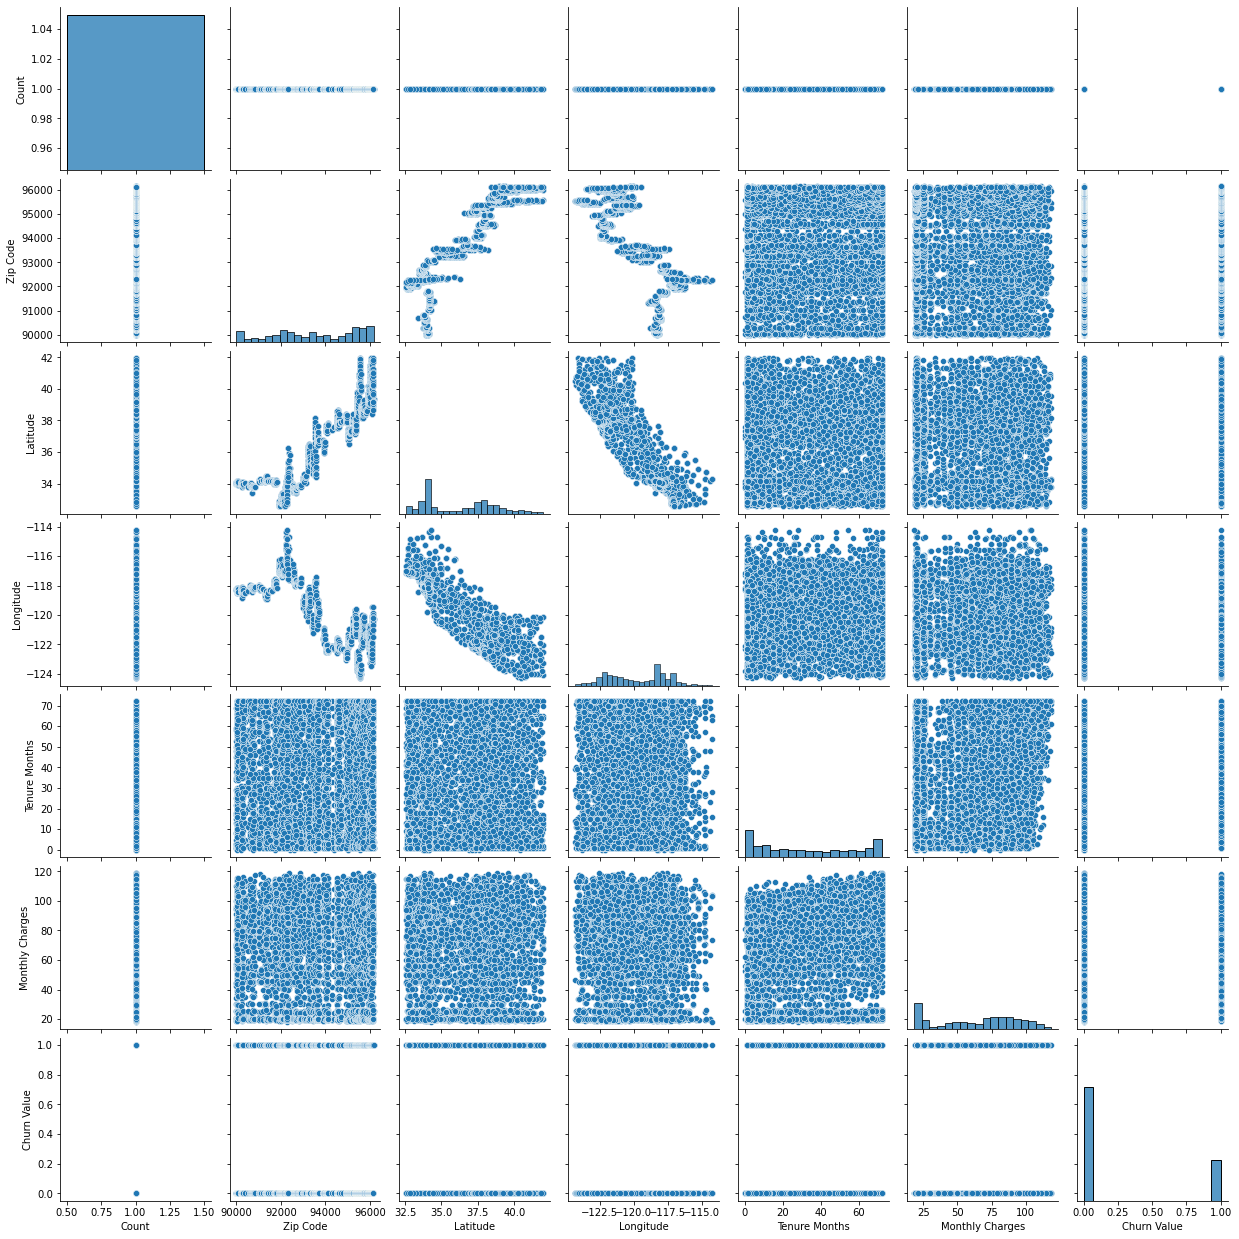

In [38]:
sns.pairplot(df)

# NOTES
* remove 'count'
* Drop 'Churn Label' - same as 'Churn Value'
* remove 'Country' and 'State' - all info is **California, United States**
* missing data only in 'Churn Reason', can fillna with 'No Reason' or similar
* Check 'Lat Long', if repeated data then can remove
* No trends from pairplot numerical data
* Lots of objects, need to handle before 
* 'Total Charges' missing 11 values, but could be an amalgamation of 'Tenure Months' and 'Monthly Charges'
    * Either fill in or remove rows
* Remove zipcode for multicollinearity
* Maybe remove phone service because same info as multiple lines, although phone service maybe better for decision tree

In [52]:
df['Total Charges'].value_counts()

20.2      11
          11
19.75      9
19.65      8
20.05      8
          ..
444.75     1
5459.2     1
295.95     1
394.1      1
6844.5     1
Name: Total Charges, Length: 6531, dtype: int64

In [ ]:
def feat_eng(df):
    df.drop(columns = ['Count', 'Churn Label', 'Country', 'State', 'Lat Long'])
    

<AxesSubplot:xlabel='Senior Citizen', ylabel='Monthly Charges'>

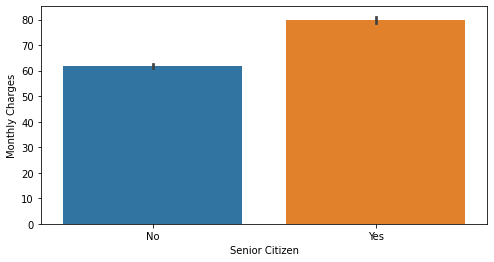

In [126]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, 
            x='Senior Citizen', 
            y='Monthly Charges')

In [84]:
# Fill in churn reason missing values
df2 = df.copy()
df2['Churn Reason'].fillna('No reason', inplace = True)

In [104]:
cols = df.columns

for i in range(31):
    vals = df[cols[i]].unique()
    print(cols[i], vals)

CustomerID ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Count [1]
Country ['United States']
State ['California']
City ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Zip Code [90003 90005 90006 ... 96128 96134 96146]
Lat Long ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Latitude [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
Longitude [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
Gender ['Male' 'Female']
Senior Citizen ['No' 'Yes']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
Tenure Months [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
Phone Service ['Yes' 'No']
Mult

<Figure size 864x432 with 0 Axes>

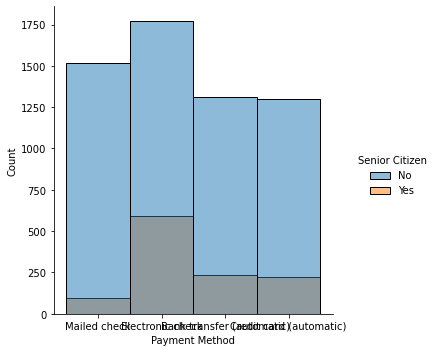

In [127]:
plt.figure(figsize=(12,6))
sns.displot(data=df, 
            x = 'Payment Method',
            hue = 'Senior Citizen')
            #bins=13,
            #kde=True)

plt.title('')
plt.show()

In [119]:
df.loc[df['Multiple Lines'] == 'No phone service'][['Phone Service', 'Multiple Lines']]

,Phone Service,Multiple Lines
6,No,No phone service
9,No,No phone service
30,No,No phone service
31,No,No phone service
39,No,No phone service
...,...,...
7014,No,No phone service
7017,No,No phone service
7032,No,No phone service
7037,No,No phone service


In [128]:
def TotalChargesEst(df):
    df['total_charges'] = pd.to_numeric(df['total_charges'].replace(' ', np.nan), errors='coerce')

    changed_indices = df[df['total_charges'].isna()].index

    calculated_total = df['monthly_charges']*df['tenure_months']
    df['total_charges'] = df['total_charges'].fillna(calculated_total)

    return df, changed_indices


In [168]:
def Cleaning(rawdf, catcol, boolcol, stringcol, floatcol,
             dropcol):
    df = rawdf.copy()

    #Change Column Names
    df.columns = df.columns.str.replace(' ',  '_').str.lower()
    #print(df.columns)

    #FillMissingData Section
    df, est_indicies = TotalChargesEst(df)
    df['churn_reason'].fillna('No Reason', inplace=True)

    #ChangeType Section
    
    for i in catcol:
        df[i] = df[i].astype('category')
    for j in boolcol:
        df[j] = df[j].astype('bool')
    for k in stringcol:
        df[k] = df[k].astype('string')
    for l in floatcol:
        df[l] = df[l].astype('float')

    #DropColumns
    df.drop(columns=dropcol, inplace=True)

    return df

In [169]:
CatCol = ['city', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'contract', 'paperless_billing', 'payment_method', 'churn_reason']
BoolCol = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'churn_value']
StringCol = ['customerid']
FloatCol = ['total_charges']
DropCol = ['country', 'count', 'churn_label', 'lat_long', 'state']

#phone service and multiple lines same information

cleandf = Cleaning(df, catcol=CatCol, boolcol=BoolCol, stringcol=StringCol, floatcol=FloatCol, dropcol=DropCol)
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerid         7043 non-null   string  
 1   city               7043 non-null   category
 2   zip_code           7043 non-null   int64   
 3   latitude           7043 non-null   float64 
 4   longitude          7043 non-null   float64 
 5   gender             7043 non-null   bool    
 6   senior_citizen     7043 non-null   bool    
 7   partner            7043 non-null   bool    
 8   dependents         7043 non-null   bool    
 9   tenure_months      7043 non-null   int64   
 10  phone_service      7043 non-null   bool    
 11  multiple_lines     7043 non-null   category
 12  internet_service   7043 non-null   category
 13  online_security    7043 non-null   category
 14  online_backup      7043 non-null   category
 15  device_protection  7043 non-null   category
 16  tech_s

In [135]:
df.columns.str.replace(' ',  '_').str.lower()

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_reason'],
      dtype='object')